In [1]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = False
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = False
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.994791666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666665
 |>  150


In [5]:
n = 100
min_f = 3
max_f = 20
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
y_train = x_train

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9958333333333345
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0000000000000036
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.998958333333336
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0041666666666687
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.992708333333334
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.990625
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000012
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0052083333333326
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.004166666666668
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000004
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.990624999999999
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.011458333333335
 |>  150
 [DEBUG] > 
 |>  to

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.011458333333333
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000012
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0229166666666685
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000026
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.995833333333332
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.997916666666669
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.991666666666669
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9979166666666672
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0197916666666687
 |>  150


In [6]:
x_train.shape

(273, 150, 1)

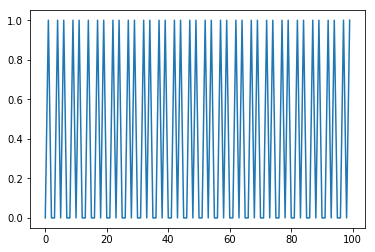

In [7]:
plt.plot(x_train[0,:100])

In [8]:
x_train.shape

(273, 150, 1)

In [57]:
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = y_train.shape[1:] # shape of a single sample
# output_length = y_train.shape[1:][0]
hidden_layer_length = 50
input_shape

(150, 1)

In [58]:
output_shape

(150, 1)

In [59]:
num_encoder_tokens = x_train.shape[-1]
num_decoder_tokens = y_train.shape[-1]
# latent_dim = 1

In [60]:
k_reg = regularizers.l2(0.01)
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(0.01)

def encoder(input_shape, output_length, dropout=0.10):
    input_layer = Input(shape=input_shape)
    x = input_layer
    
    w1 = input_shape[0] * 2
    w2 = w1 * 2
    print('w1', w1,'w2', w2)

    # [Conv | Pool]
    x = Conv1D(w1, kernel_size=2, strides=2, activation='relu', padding='same')(x)
    x = Conv1D(w1, kernel_size=2, strides=1, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2, strides=2)(x) # TODO padding='same'
    
#     x = Conv1D(w2, kernel_size=2, strides=2, activation='relu')(x)
#     x = Conv1D(w2, kernel_size=2, strides=1, activation='relu')(x)
#     x = MaxPooling1D(pool_size=2, strides=2)(x)
    
    # [Dense]
    x = Flatten()(x)
    x = Dense(150, activation='relu')(x)
    
#     x = Dense(100, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)    
#     x = Dropout(dropout)(x)

#     x = Dense(100, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(x)

#     x = Dense(1000, activation='relu')(x)
#     x = Dense(1000, activation='relu')(x)
#     x = Dropout(dropout)(x)
    
#     x = Dense(100, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dropout(dropout)(x)    
    
    x = Dense(output_length, activation='relu')(x) # softmax
#     x = Dense(output_length, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def decoder(input_length, output_shape, dropout=0.10):
    input_layer = Input(shape=(input_length,))
    x = input_layer
    shape = output_shape
   
    x = Dense(150, activation='relu')(x)
#     x = Dense(1000, activation='relu')(x)
#     x = Dropout(dropout)(x)
    
    x = Reshape((75,2))(x) # 250 * 4 = 1000
    x = UpSampling1D(4)(x)
    x = Conv1D(2, kernel_size=2, strides=1, activation='relu', padding='same')(x)
#     x = Conv1D(10, kernel_size=2, strides=1, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2, strides=2)(x)
    
    x = Flatten()(x)
    dims = keras.backend.int_shape(x)
    print('dims', dims)
    
    x = Dense(np.prod(shape), activation='relu')(x)
    x = Dropout(dropout)(x)
    
    x = Dense(np.prod(shape), activation='sigmoid')(x)
    x = Reshape(shape)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def autoencoder(input_shape, output_shape, hidden_layer_length=10, dropout=0.10, verbose=False):
    input_ = Input(shape=input_shape)
    encode = encoder(input_shape, hidden_layer_length, dropout)
    if verbose:
        encode.summary()
    decode = decoder(hidden_layer_length, output_shape, dropout)
    if verbose:
        decode.summary()
    model = Model(input_, decode(encode(input_)))
    return encode, decode, model

dropout = 0.2
encoder, decoder, model = autoencoder(input_shape, output_shape, hidden_layer_length, dropout, True)

w1 300 w2 600
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 150, 1)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 75, 300)           900       
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 75, 300)           180300    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 37, 300)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 11100)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 150)               1665150   
_________________________________________________________________
dense_37 (Dense)             (None, 30)                4530   

In [61]:
metrics = ['accuracy','mse','binary_crossentropy'] # sparse_categorical_accuracy
loss = 'binary_crossentropy'# binary_crossentropy categorical_crossentropy sparse_categorical_crossentropy
optimizer = 'adam' # adam adadelta rmsprop nadam
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=optimizer, loss=loss, metrics=['mse', 'mae', 'accuracy'])#, metrics=metrics)

In [62]:
batch_size = 16
# n epochs = n iterations over all the training data
epochs = 50

In [63]:
callbacks = []
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]
vs = 1/6
m = 100
# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
history = model.fit(x_train[:m],x_train[:m], epochs=epochs, batch_size=batch_size,
          validation_split=vs, callbacks=callbacks)

Train on 83 samples, validate on 17 samples
Epoch 1/50
83/83 [==============================] - 1s 10ms/step - loss: 0.6919 - mean_squared_error: 0.2494 - mean_absolute_error: 0.4992 - acc: 0.5438 - val_loss: 0.6834 - val_mean_squared_error: 0.2451 - val_mean_absolute_error: 0.4938 - val_acc: 0.5894
Epoch 2/50
83/83 [==============================] - 0s 6ms/step - loss: 0.6816 - mean_squared_error: 0.2441 - mean_absolute_error: 0.4873 - acc: 0.5812 - val_loss: 0.6610 - val_mean_squared_error: 0.2340 - val_mean_absolute_error: 0.4775 - val_acc: 0.6588
Epoch 3/50
83/83 [==============================] - 0s 6ms/step - loss: 0.6610 - mean_squared_error: 0.2342 - mean_absolute_error: 0.4739 - acc: 0.6207 - val_loss: 0.6312 - val_mean_squared_error: 0.2194 - val_mean_absolute_error: 0.4490 - val_acc: 0.7078
Epoch 4/50
83/83 [==============================] - 0s 6ms/step - loss: 0.6366 - mean_squared_error: 0.2226 - mean_absolute_error: 0.4492 - acc: 0.6459 - val_loss: 0.6091 - val_mean_squar

Epoch 33/50
83/83 [==============================] - 0s 5ms/step - loss: 0.5105 - mean_squared_error: 0.1706 - mean_absolute_error: 0.3480 - acc: 0.7413 - val_loss: 0.5630 - val_mean_squared_error: 0.1870 - val_mean_absolute_error: 0.3595 - val_acc: 0.7353
Epoch 34/50
83/83 [==============================] - 0s 5ms/step - loss: 0.4995 - mean_squared_error: 0.1668 - mean_absolute_error: 0.3314 - acc: 0.7500 - val_loss: 0.5634 - val_mean_squared_error: 0.1886 - val_mean_absolute_error: 0.3666 - val_acc: 0.7251
Epoch 35/50
83/83 [==============================] - 0s 5ms/step - loss: 0.4966 - mean_squared_error: 0.1658 - mean_absolute_error: 0.3356 - acc: 0.7524 - val_loss: 0.5600 - val_mean_squared_error: 0.1876 - val_mean_absolute_error: 0.3696 - val_acc: 0.7263
Epoch 36/50
83/83 [==============================] - 0s 5ms/step - loss: 0.4879 - mean_squared_error: 0.1623 - mean_absolute_error: 0.3256 - acc: 0.7566 - val_loss: 0.5697 - val_mean_squared_error: 0.1911 - val_mean_absolute_erro

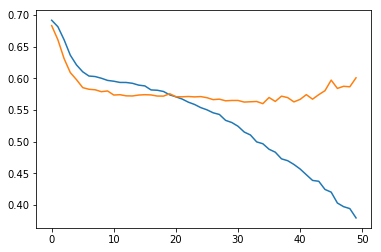

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

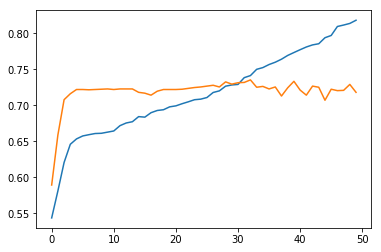

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

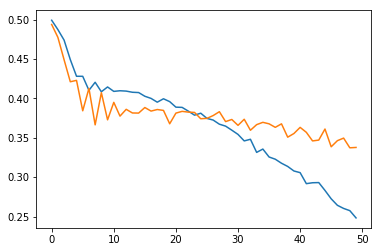

In [66]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [67]:
results = model.predict(x_train[:10])
results.shape

(10, 150, 1)

(0, 1)

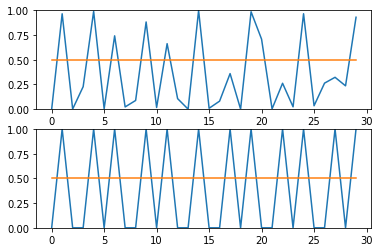

In [68]:
n1 = 30
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i][:n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [20]:
mid = midi.decode_track(context, result)
dn = config.dataset_dir
# io.export_midifile(mid, dn + 'song_seq-seq.mid')

NameError: name 'result' is not defined

In [ ]:
results = []
latent_samples = []
for seq in x_test[-2:]:
    encoded = encode_sequence(np.stack([seq]))
    latent_samples.append(encoded)
    result = decode_sequence(encoded, encoder_model, decoder_model)
    results.append(result)
results[0].shape

In [ ]:
len(encoded)

In [ ]:
encoded[0].shape

In [ ]:
plt.plot(encoded[0][0,:10])
plt.plot(encoded[1][0,:10])

In [ ]:
e = np.array(latent_samples)
e.shape

In [ ]:
# reduce dimensionality
# e = e.reshape(e.shape[0],2,e.shape[-1])
e.shape

In [ ]:
e1.mean(axis=0).shape

In [ ]:
# new = e.transpose().mean(axis=1).transpose()
e1 = e[:,0] # state h
e2 = e[:,1] # state c
new = [e1.mean(axis=0), e2.mean(axis=0)]
# new = [[e[:,i].mean(axis=0)] for i in [0,1]]
plt.plot(new[0][0][:10])
len(new)

In [ ]:
e1.mean(axis=0).shape

In [ ]:
l[0].shape

In [ ]:
l = latent_samples[0]
len(l) # latent_sample :: (x,1,64)

In [ ]:
# new_ = decode_sequence(latent_samples[0], encoder_model, decoder_model)
new_ = decode_sequence(new, encoder_model, decoder_model)

In [ ]:
new_.shape

In [ ]:
plt.plot(new_[:100])

In [ ]:
plt.plot(results[0][:100])

In [ ]:
# results[0]

In [ ]:
mid_new = midi.decode_track(context, results[0])
io.export_midifile(mid_new, config.export_dir + 'real_mid_new_lstm.mid')

## Alt
Without teacher forcing https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html


<i>"In some niche cases you may not be able to use teacher forcing, because you don't have access to the full target sequences, e.g. if you are doing online training on very long sequences, where buffering complete input-target pairs would be impossible. In that case, you may want to do training by reinjecting the decoder's predictions into the decoder's input, just like we were doing for inference.

You can achieve this by building a model that hard-codes the output reinjection loop: "</i>

In [ ]:
from keras.layers import Lambda
from keras import backend as K

# The first part is unchanged
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder(encoder_inputs)
states = [state_h, state_c]

# Set up the decoder, which will only process one timestep at a time.
decoder_inputs = Input(shape=(1, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# output will be a probability distribution over the vectors
decoder_dense = Dense(num_decoder_tokens, activation='softmax')

all_outputs = []
inputs = decoder_inputs
max_decoder_seq_length = 100
for _ in range(max_decoder_seq_length):
    # Run the decoder on one timestep
    outputs, state_h, state_c = decoder_lstm(inputs,
                                             initial_state=states)
    outputs = decoder_dense(outputs)
    # Store the current prediction (we will concatenate all predictions later)
    all_outputs.append(outputs)
    # Reinject the outputs as inputs for the next loop iteration
    # as well as update the states
    inputs = outputs
    states = [state_h, state_c]

# Concatenate all predictions
decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)

# Define and compile model as previously
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Prepare decoder input data that just contains the start character
# Note that we could have made it a constant hard-coded in the model
decoder_input_data = np.zeros((x_train.shape[0], 1, num_decoder_tokens))

# Train model as previously
model.fit([x_train,y_train], z_train, epochs=10, batch_size=batch_size,
          validation_split=0.2, callbacks=callbacks)

In [ ]:
x_test.shape

In [ ]:
# x_test, y_test = gen_xy_sin_to_f(3, f=2)

In [ ]:
results = model.predict([x_test,x_test])
results.shape

In [ ]:
# the 'true' results
i = 0
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],y_test[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
# predicted results
i = 0
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 2
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 0
selection = 1
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)